# Exploratory Data Analysis and Initial Model Creation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import scipy.stats as stats
import modeling
import data_viz
import data_cleaning
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
%matplotlib inline
sns.set(font_scale=1.5)


In [2]:
df = pd.read_csv('datasets/train_cleaned.csv')
df_test = pd.read_csv('datasets/test_cleaned.csv')
model_df = pd.read_csv('datasets/models.csv')
modeling.test_columns(df=df, df_test=df_test)
%store -r features5

In [3]:
df.shape

(2034, 87)

In [4]:
df_test.shape

(879, 86)

# EDA for Potential Categorical Features

In [5]:
mean_price = df.saleprice.mean()

def greater_than_mean(columns,data=df,mean_price=mean_price):
    for column in columns:
        print(df.groupby(by = column
              ).mean()['saleprice'].T.sort_values(ascending=False) >= mean_price)
        print('------------------------')
potential_cats = ['ms_subclass',
                  'lot_config',
                  'neighborhood',
                  'condition_2',
                  'house_style',
                  'roof_matl',
                  'exterior_1st',
                  'exterior_2nd',
                  'bsmtfin_type_1',
                  'central_air',
                  'garage_type'
                 ]

From this you can you get the info of what items correlate with a higher than the average sale price. Don't run it!

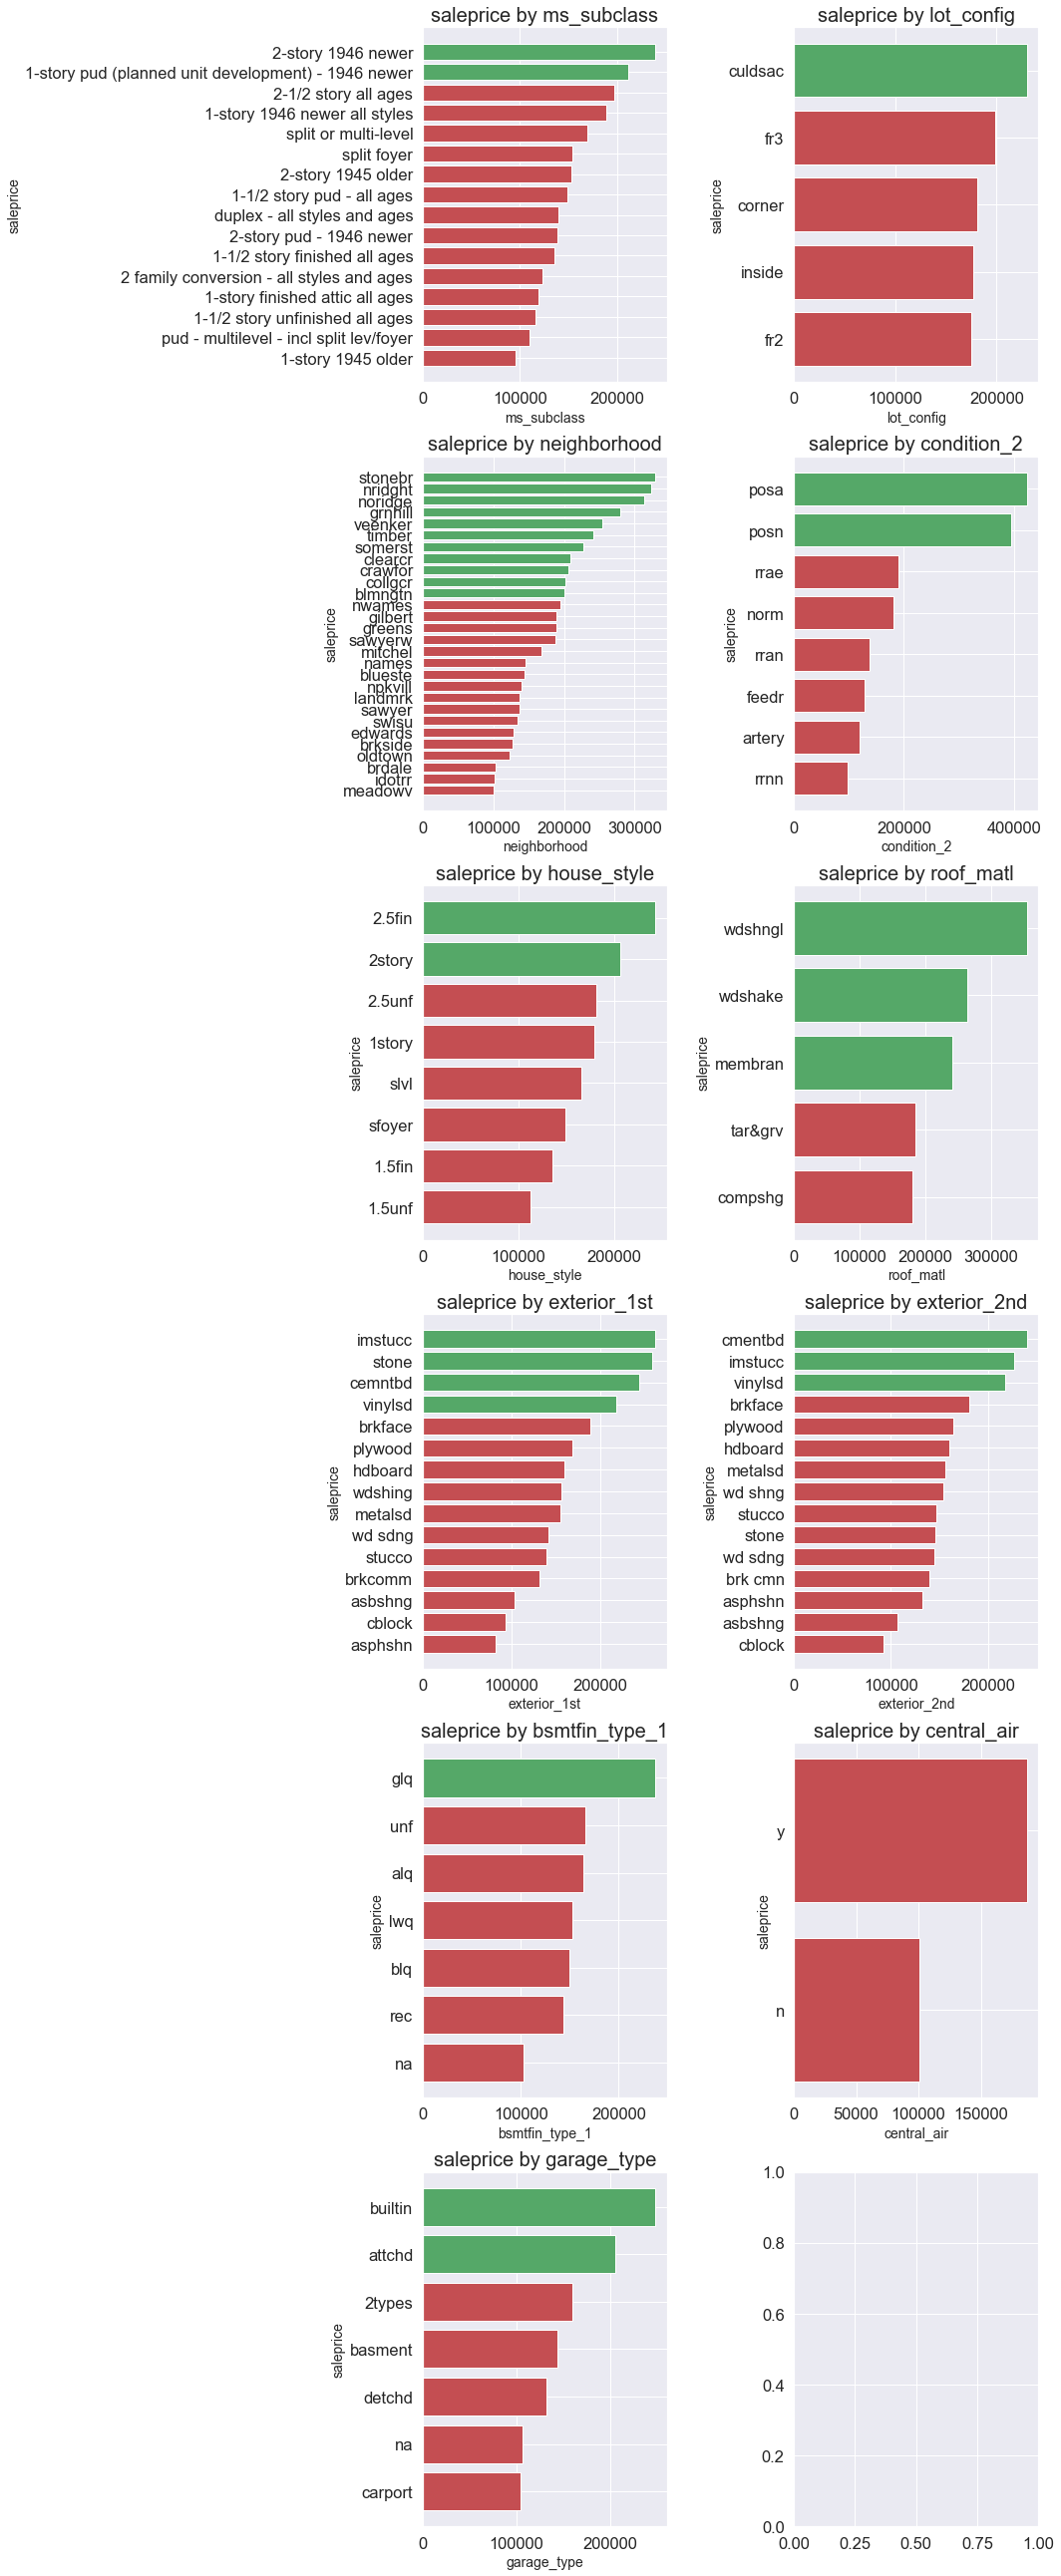

In [6]:
data_viz.graph_greater_than_mean(potential_cats,
                       df,
                       mean_price+mean_price*.10,
                       target='saleprice')

## 1 Hot Creating Dummy Variables for the existing non-numeric variables

In [7]:
dummy_cols = potential_cats

In [8]:
df = pd.get_dummies(df, columns=dummy_cols, drop_first=True)
df.shape

(2034, 181)

In [9]:
df_test = pd.get_dummies(df_test, columns=dummy_cols, drop_first=True)
df_test.shape

(879, 173)

# Export your test data here!

In [10]:
data_cleaning.snake_df(df)
data_cleaning.snake_df(df_test)
modeling.test_columns(df, df_test)
df.to_csv('datasets/train_cleaned_dummied.csv', index=False)
df_test.to_csv('datasets/test_cleaned_dummied.csv', index=False)

Added ms_subclass_1-1/2_story_pud_-_all_ages to the test dataframe
Added ms_subclass_1-1/2_story_unfinished_all_ages to the test dataframe
Added ms_subclass_1-story_1945_older to the test dataframe
Added ms_subclass_1-story_1946_newer_all_styles to the test dataframe
Added ms_subclass_1-story_finished_attic_all_ages to the test dataframe
Added ms_subclass_1-story_pud_(planned_unit_development)_-_1946_newer to the test dataframe
Added ms_subclass_2-story_1945_older to the test dataframe
Added ms_subclass_2-story_1946_newer to the test dataframe
Added ms_subclass_2-story_pud_-_1946_newer to the test dataframe
Added neighborhood_grnhill to the test dataframe
Added neighborhood_landmrk to the test dataframe
Added condition_2_feedr to the test dataframe
Added condition_2_rrae to the test dataframe
Added condition_2_rran to the test dataframe
Added condition_2_rrnn to the test dataframe
Added roof_matl_membran to the test dataframe
Added exterior_1st_cblock to the test dataframe
Added exteri

Reimport it in case you start over again.

In [11]:
df = pd.read_csv('datasets/train_cleaned_dummied.csv')
df_test = pd.read_csv('datasets/test_cleaned_dummied.csv')
model_df = pd.read_csv('datasets/models.csv')

In [12]:
df.shape

(2034, 181)

In [13]:
df_test.shape

(879, 193)

## Examining our encoded variables
Start over again with the correlation map

In [14]:
encoded = ['ms_subclass_1-1/2_story_pud_-_all_ages',
       'ms_subclass_1-1/2_story_unfinished_all_ages',
       'ms_subclass_1-story_1945_older',
       'ms_subclass_1-story_1946_newer_all_styles',
       'ms_subclass_1-story_finished_attic_all_ages',
       'ms_subclass_1-story_pud_(planned_unit_development)_-_1946_newer',
       'ms_subclass_2_family_conversion_-_all_styles_and_ages',
       'ms_subclass_2-1/2_story_all_ages',
       'ms_subclass_2-story_1945_older', 'ms_subclass_2-story_1946_newer',
       'ms_subclass_2-story_pud_-_1946_newer',
       'ms_subclass_duplex_-_all_styles_and_ages',
       'ms_subclass_pud_-_multilevel_-_incl_split_lev/foyer',
       'ms_subclass_split_foyer', 'ms_subclass_split_or_multi-level',
       'lot_config_culdsac', 'lot_config_fr2', 'lot_config_fr3',
       'lot_config_inside', 'neighborhood_blueste', 'neighborhood_brdale',
       'neighborhood_brkside', 'neighborhood_clearcr',
       'neighborhood_collgcr', 'neighborhood_crawfor',
       'neighborhood_edwards', 'neighborhood_gilbert',
       'neighborhood_greens', 'neighborhood_grnhill',
       'neighborhood_idotrr', 'neighborhood_landmrk',
       'neighborhood_meadowv', 'neighborhood_mitchel',
       'neighborhood_names', 'neighborhood_noridge',
       'neighborhood_npkvill', 'neighborhood_nridght',
       'neighborhood_nwames', 'neighborhood_oldtown',
       'neighborhood_sawyer', 'neighborhood_sawyerw',
       'neighborhood_somerst', 'neighborhood_stonebr',
       'neighborhood_swisu', 'neighborhood_timber',
       'neighborhood_veenker', 'condition_2_feedr', 'condition_2_norm',
       'condition_2_posa', 'condition_2_posn', 'condition_2_rrae',
       'condition_2_rran', 'condition_2_rrnn', 'house_style_1.5unf',
       'house_style_1story', 'house_style_2.5fin', 'house_style_2.5unf',
       'house_style_2story', 'house_style_sfoyer', 'house_style_slvl',
       'roof_matl_membran', 'roof_matl_tar&grv', 'roof_matl_wdshake',
       'roof_matl_wdshngl', 'exterior_1st_asphshn',
       'exterior_1st_brkcomm', 'exterior_1st_brkface',
       'exterior_1st_cblock', 'exterior_1st_cemntbd',
       'exterior_1st_hdboard', 'exterior_1st_imstucc',
       'exterior_1st_metalsd', 'exterior_1st_plywood',
       'exterior_1st_stone', 'exterior_1st_stucco',
       'exterior_1st_vinylsd', 'exterior_1st_wd_sdng',
       'exterior_1st_wdshing', 'exterior_2nd_asphshn',
       'exterior_2nd_brk_cmn', 'exterior_2nd_brkface',
       'exterior_2nd_cblock', 'exterior_2nd_cmentbd',
       'exterior_2nd_hdboard', 'exterior_2nd_imstucc',
       'exterior_2nd_metalsd', 'exterior_2nd_plywood',
       'exterior_2nd_stone', 'exterior_2nd_stucco',
       'exterior_2nd_vinylsd', 'exterior_2nd_wd_sdng',
       'exterior_2nd_wd_shng', 'bsmtfin_type_1_blq', 'bsmtfin_type_1_glq',
       'bsmtfin_type_1_lwq', 'bsmtfin_type_1_na', 'bsmtfin_type_1_rec',
       'bsmtfin_type_1_unf', 'central_air_y', 'garage_type_attchd',
       'garage_type_basment', 'garage_type_builtin',
       'garage_type_carport', 'garage_type_detchd', 'garage_type_na','logsaleprice']

In [15]:
np.abs(df[encoded].corr()[['logsaleprice']].sort_values(by='logsaleprice', ascending=False)[:10]) >= .3

,logsaleprice
logsaleprice,True
bsmtfin_type_1_glq,True
garage_type_attchd,True
central_air_y,True
neighborhood_nridght,True
ms_subclass_2-story_1946_newer,True
exterior_1st_vinylsd,True
exterior_2nd_vinylsd,True
neighborhood_noridge,False
house_style_2story,False


In [16]:
features6 = ['bsmtfin_sf_1',
'heating_qc',
'fireplace_qu',
'year_built',
'bsmt_qual',
'1st_flr_sf',
'garage_area',
'kitchen_qual',
'gr_liv_area',
'exter_qual',
'overall_qual',
'porches',
'baths',
'open_porch_sf',
'full_bath',
'lot',
'lot_area',
'overall_cond',
'bsmtfin_sf_1',
'2nd_flr_sf',
'half_bath',
'total_bsmt_sf',
'fireplaces',
'year_remod/add',
'central_air_y',
'neighborhood_nridght',
'neighborhood_stonebr',
'neighborhood_noridge',
]

target = 'logsaleprice'

model_df = modeling.new_test(df = df,
        test_df = df_test,
        features = features6,
        target = target,
         random_state = 1,
         model_type = LinearRegression,
         model_df = model_df,
        scaled=False,
        );
y=df[target]
ols_X = sm.add_constant(df[features6])
model6_ols = sm.OLS(y,ols_X).fit()
model6_ols.summary()

Training Data Score: 0.9089304794321711
Test Data Score: 0.8877166155386487
Cross Validation Score: 0.9034016170587453


/Users/justinaugust/.conda/envs/dsi/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logsaleprice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     705.9
Date:                Thu, 03 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:48:07   Log-Likelihood:                 1320.7
No. Observations:                2034   AIC:                            -2585.
Df Residuals:                    2006   BIC:                            -2428.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.5094      0.494      3.054      0.002       0.540       2.479
bsmtfin_sf_1             0.0066      0.001     12.324      0.000       0.006       0.008
heating_qc               0.0185      0.004      4.815      0.000       0.011       0.026
fireplace_qu             0.0061      0.003      1.798      0.072      -0.001       0.013
year_built               0.0024      0.000     12.774      0.000       0.002       0.003
bsmt_qual                0.0174      0.005      3.225      0.001       0.007       0.028
1st_flr_sf               0.1928      0.033      5.870      0.000       0.128       0.257
garage_area              0.0001   1.81e-05      6.809      0.000     8.8e-05       0.000
kitchen_qual             0.0351      0.007      5.052      0.000       0.022       0.049
gr_liv_area              0.2019      0.041      4.914      0.000       0.121       0.282
exter_qual               0.0418      0.009      4.888      0.000       0.025       0.059
overall_qual             0.3538      0.020     17.422      0.000       0.314       0.394
porches               7.062e-07   2.93e-07      2.412      0.016    1.32e-07    1.28e-06
baths                    0.0046      0.010      0.450      0.653      -0.015       0.025
open_porch_sf           -0.0002      0.002     -0.091      0.928      -0.003       0.003
full_bath                0.0024      0.009      0.256      0.798      -0.016       0.021
lot                   3.229e-08   7.07e-09      4.569      0.000    1.84e-08    4.62e-08
lot_area              6.287e-06   7.55e-07      8.323      0.000    4.81e-06    7.77e-06
overall_cond             0.0454      0.003     13.573      0.000       0.039       0.052
bsmtfin_sf_1             0.0066      0.001     12.324      0.000       0.006       0.008
2nd_flr_sf               0.0001   2.73e-05      3.748      0.000    4.87e-05       0.000
half_bath               -0.0020      0.017     -0.113      0.910      -0.036       0.032
total_bsmt_sf         7.961e-05   1.42e-05      5.598      0.000    5.17e-05       0.000
fireplaces               0.0279      0.009      2.940      0.003       0.009       0.046
year_remod/add           0.0006      0.000      2.780      0.005       0.000       0.001
central_air_y            0.0365      0.013      2.749      0.006       0.010       0.062
neighborhood_nridght     0.0589      0.014      4.136      0.000       0.031       0.087
neighborhood_stonebr     0.1057      0.022      4.795      0.000       0.062       0.149
neighborhood_noridge     0.0396      0.021      1.907      0.057      -0.001       0.080
==============================================================================
Omnibus:                      956.666   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25172.03

In [19]:
data_cleaning.snake_df(df)
data_cleaning.snake_df(df_test)
modeling.test_columns(df, df_test)
df.to_csv('datasets/train_cleaned.csv', index=False)
df_test.to_csv('datasets/test_cleaned.csv', index=False)
model_df.to_csv('datasets/models.csv')

### Move on to the last stage: [Algorithmic Parameter Choice & Feature Selection]('4_Algorithmic_feature_parameter_choice.ipynb')